Name: Aayam Raj Shakya (as5160)

4.1. (Gradient descent method). Implement the gradient descent algorithm (4.15) and the gradient descent algorithm with backtracking line search (4.19).

In [1]:
# Importing required libraries

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import rosen, rosen_der, rosen_hess

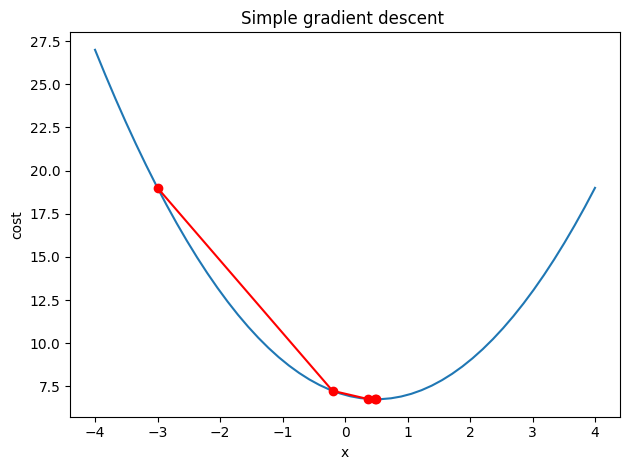

In [2]:
# 4.1 Gradient Descent Algorithm (plain)

# x^2 - x + 7
def polynomial(x):
  return x**2 - x + 7

# 2x - 1
def gradient_P(x):
  return 2*x - 1

def grad_descent(initial_guess = -3, step_size = 0.4, n_iters = 4):
  x = initial_guess
  gamma = step_size
  # storing the initial x and y values
  x_values = [x]
  y_values = [polynomial(x)]

  for i in range(n_iters):
    x = x - (gamma * gradient_P(x))
    x_values.append(x)
    y_values.append(polynomial(x))

  return x_values, y_values

x_axis_val, y_axis_val = grad_descent()

# plotting
x_axis = np.linspace(-4, 4)
y_axis = polynomial(x_axis)
plt.plot(x_axis,y_axis)
plt.plot(x_axis_val, y_axis_val, 'o-', color='red')
plt.xlabel("x")
plt.ylabel("cost")
plt.title("Simple gradient descent ")
plt.tight_layout()
plt.show()

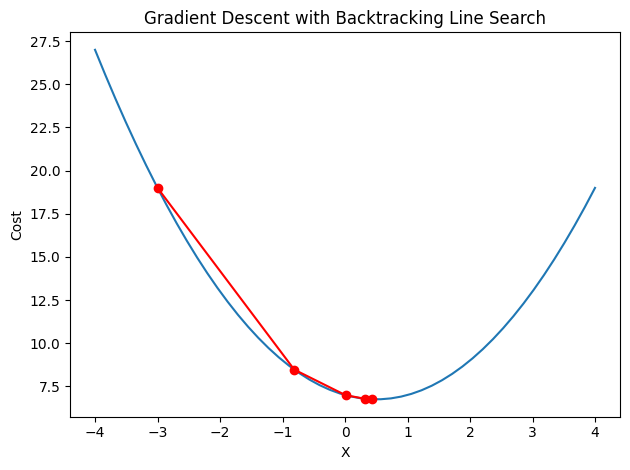

In [3]:
# 4.1 Gradient Descent Algorithm with Backtracking Line Search (plain)

# x^2 - x + 7
def polynomial(x):
  return x**2 - x + 7

# 2x - 1
def gradient_P(x):
  return 2*x - 1

def gd_backtrack(initial_guess=-3, step_size=5, n_iters=4):
  x = initial_guess
  gamma = step_size
  x_values = [x]
  y_values = [polynomial(x)]

  for _ in range(n_iters):
    while True:
      if polynomial(x - gamma * gradient_P(x)) <= polynomial(x) - (gamma/2) * (gradient_P(x))**2:
        break
      else:
        gamma /= 2
    x = x - gamma * gradient_P(x)
    x_values.append(x)
    y_values.append(polynomial(x))

  return x_values, y_values

x_values, y_values = gd_backtrack()

# plotting
x = np.linspace(-4,4)
y = polynomial(x)
plt.plot(x, y)
plt.plot(x_values, y_values, 'o-', color="red")
plt.xlabel("X")
plt.ylabel("Cost")
plt.title("Gradient Descent with Backtracking Line Search")
plt.tight_layout()
plt.show()

The backtracking line search strategy does not make much difference in well-conditioned quadratic condition like the above.

(a) Compare their performances with the Rosenbrock function in 2D (4.2).

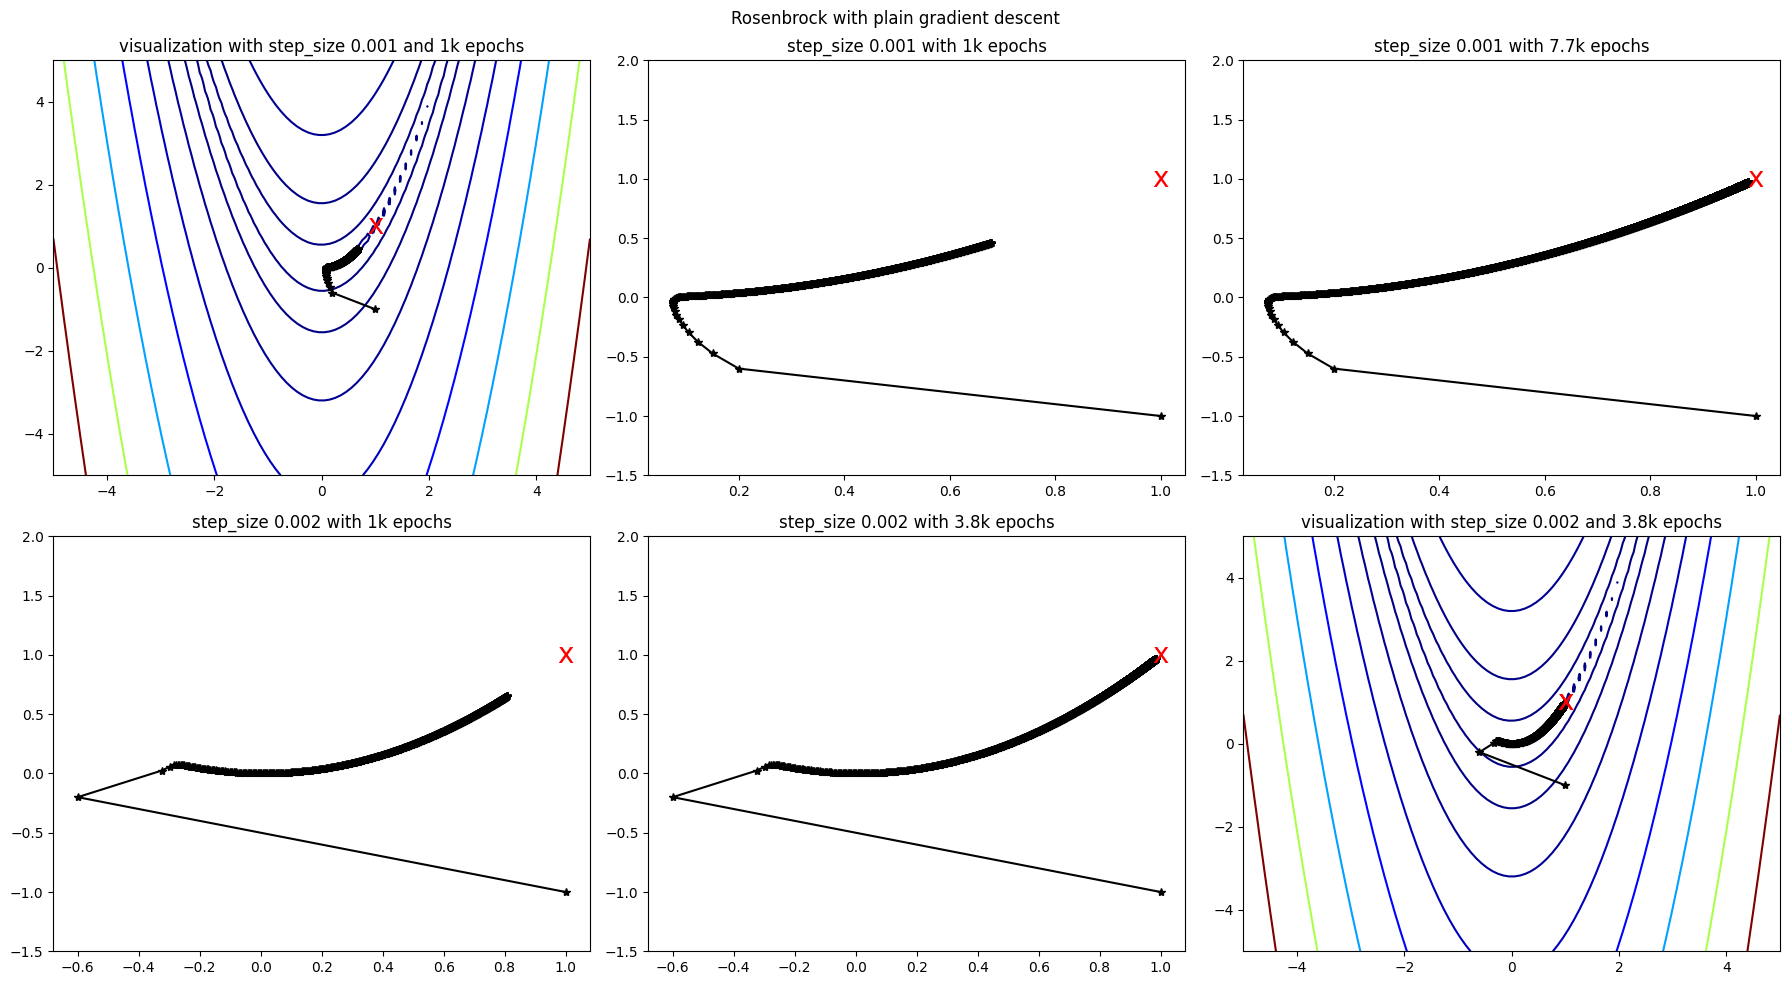

In [4]:
# Plain gradient descent with Rosenbrock function

def simple_rosenbrock(initial_guess=np.array([1,-1]),
                      step_size=0.001,
                      n_iters=1000):
    x = initial_guess
    # np.array([x, y]) = [x_coord, y_coord]
    x_values = [x[0]]
    y_values = [x[1]]

    for _ in range(n_iters):
        gamma = step_size
        x = x - gamma * rosen_der(x)
        x_values.append(x[0])
        y_values.append(x[1])

    return x_values, y_values

x_values, y_values = simple_rosenbrock()

# Copied the plotting part from Duke University notes
# Link: https://shorturl.at/mmNAa

x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)
Z = rosen(np.vstack([X.ravel(), Y.ravel()])).reshape((100, 100))

fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))

# Note: the global minimum is at (1,1) in a tiny contour island
ax[0][0].contour(X, Y, Z, np.arange(10)**5, cmap='jet')
ax[0][0].text(1, 1, 'x', va='center', ha='center', color='red', fontsize=20)
ax[0][0].plot(x_values, y_values, '*-', color="black")
ax[0][0].set_title("visualization with step_size 0.001 and 1k epochs")

# Default step size of 0.001 with default epoch of 1000
ax[0][1].plot(x_values, y_values, '*-', color='black')
ax[0][1].text(1, 1, 'x', va='center', ha='center', color='red', fontsize=20)
ax[0][1].set_title("step_size 0.001 with 1k epochs")
ax[0][1].set_ylim(-1.5, 2)

# Default step size of 0.001 with 7700 epochs
x_values_1, y_values_1 = simple_rosenbrock(n_iters=7700)
ax[0][2].plot(x_values_1, y_values_1, '*-', color='black')
ax[0][2].text(1, 1, 'x', va='center', ha='center', color='red', fontsize=20)
ax[0][2].set_title("step_size 0.001 with 7.7k epochs")
ax[0][2].set_ylim(-1.5, 2)

# Step size of 0.002 with default epoch of 1000
x_values_2, y_values_2 = simple_rosenbrock(step_size=0.002)
ax[1][0].plot(x_values_2, y_values_2, '*-', color='black')
ax[1][0].text(1, 1, 'x', va='center', ha='center', color='red', fontsize=20)
ax[1][0].set_title("step_size 0.002 with 1k epochs")
ax[1][0].set_ylim(-1.5, 2)

# Step size of 0.002 with 3800 epochs
x_values_3, y_values_3 = simple_rosenbrock(step_size=0.002, n_iters=3800)
ax[1][1].plot(x_values_3, y_values_3, '*-', color='black')
ax[1][1].text(1, 1, 'x', va='center', ha='center', color='red', fontsize=20)
ax[1][1].set_title("step_size 0.002 with 3.8k epochs")
ax[1][1].set_ylim(-1.5, 2)

# Visualization of step size of 0.002 with 3800 epochs with Rosenbrock function
x_values_4, y_values_4 = simple_rosenbrock(step_size=0.002, n_iters=3800)
ax[1][2].contour(X, Y, Z, np.arange(10)**5, cmap='jet')
ax[1][2].text(1, 1, 'x', va='center', ha='center', color='red', fontsize=20)
ax[1][2].plot(x_values_4, y_values_4, '*-', color='black')
ax[1][2].text(1, 1, 'x', va='center', ha='center', color='red', fontsize=20)
ax[1][2].set_title("visualization with step_size 0.002 and 3.8k epochs")

plt.suptitle("Rosenbrock with plain gradient descent")
plt.tight_layout()
plt.show()

As can be seen from the plots above, with lower step size **(0.001)**, we require more no. of epochs/iterataions to reach the global optimum, as compared to when slightly higher step size (in my case **0.002**) is used

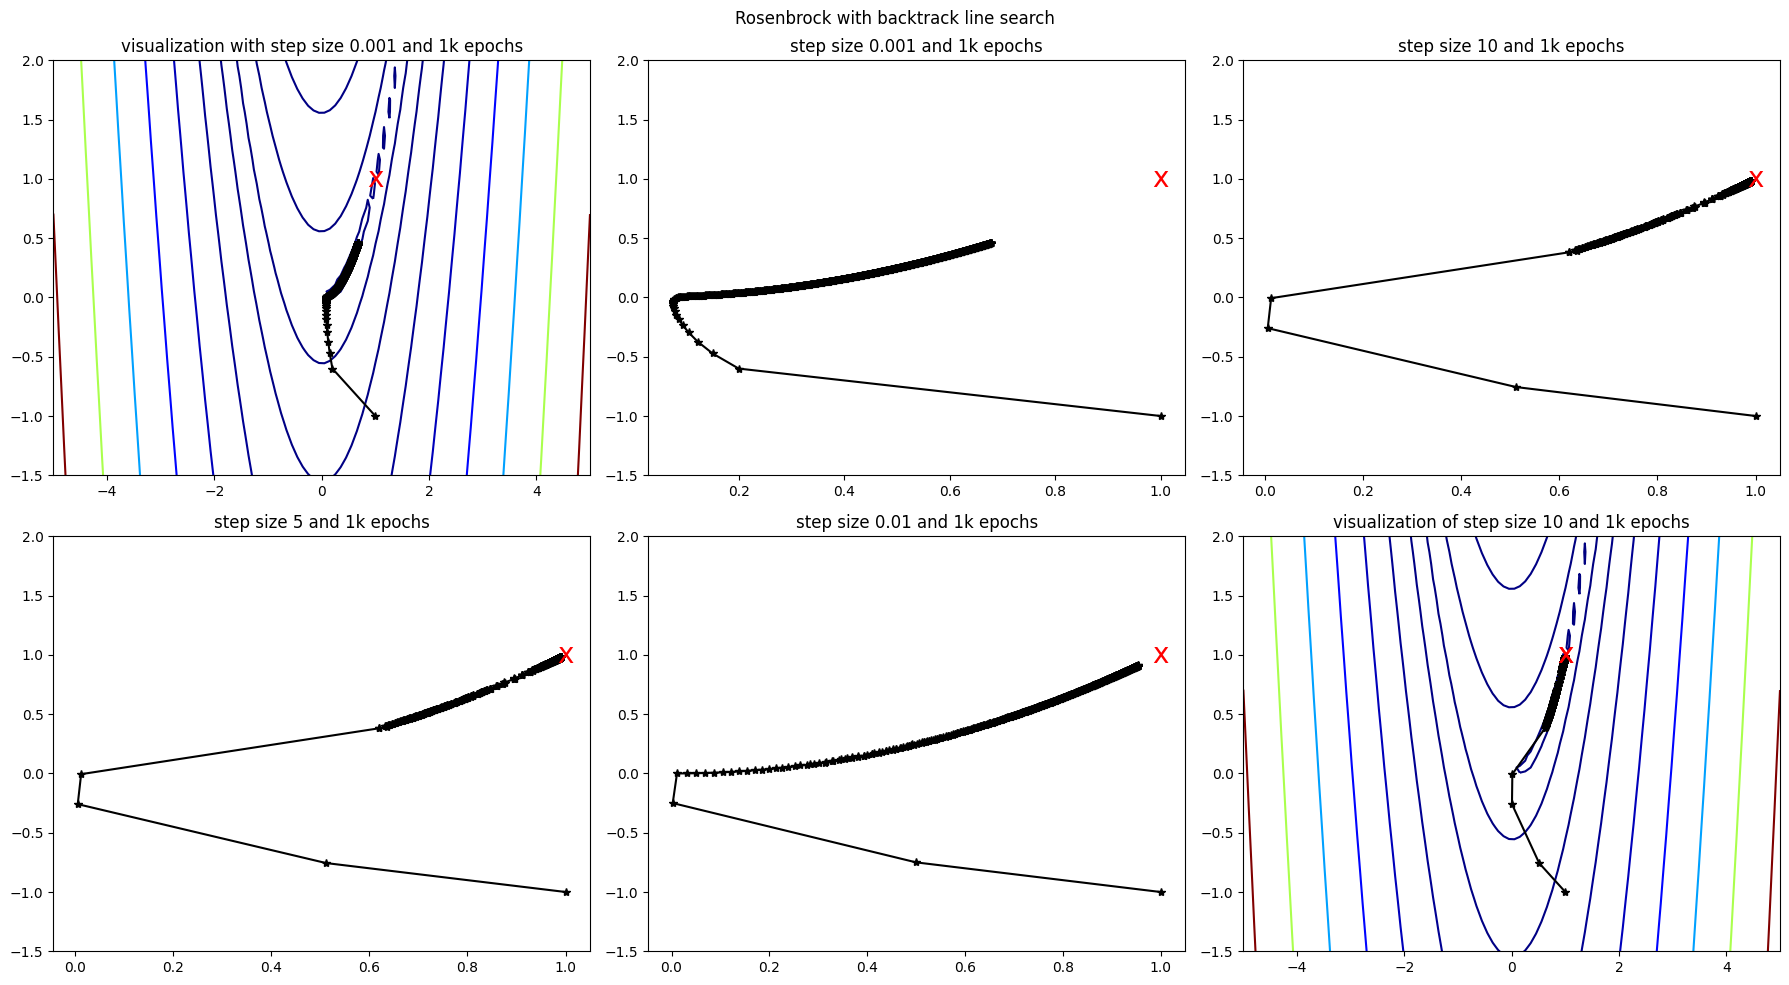

In [5]:
def backtrack_rosenbrock(initial_guess=np.array([1, -1]), step_size=0.001, n_iters=1000):
    x = initial_guess
    x_values = [x[0]]
    y_values = [x[1]]

    for _ in range(n_iters):
        gamma = step_size
        while True:
          if (rosen(x - gamma * rosen_der(x)) <= rosen(x) - (gamma/2) * (rosen_der(x))**2).all():
            break
          else:
            gamma /= 2

        x = x - gamma * rosen_der(x)
        x_values.append(x[0])
        y_values.append(x[1])

    return x_values, y_values

x_values, y_values = backtrack_rosenbrock()

x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)
Z = rosen(np.vstack([X.ravel(), Y.ravel()])).reshape((100, 100))

fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))

# Note: the global minimum is at (1,1) in a tiny contour island
ax[0][0].contour(X, Y, Z, np.arange(10)**5, cmap='jet')
ax[0][0].text(1, 1, 'x', va='center', ha='center', color='red', fontsize=20)
ax[0][0].plot(x_values, y_values, '*-', color="black")
ax[0][0].set_title("visualization with step size 0.001 and 1k epochs")
ax[0][0].set_ylim(-1.5, 2)

# Default step size of 0.001 and 1000 epochs
ax[0][1].plot(x_values, y_values, '*-', color='black')
ax[0][1].text(1, 1, 'x', va='center', ha='center', color='red', fontsize=20)
ax[0][1].set_title("step size 0.001 and 1k epochs")
ax[0][1].set_ylim(-1.5, 2)

# Step size of 10 and 1000 epochs
x_values_1, y_values_1 = backtrack_rosenbrock(step_size=10)
ax[0][2].plot(x_values_1, y_values_1, '*-', color='black')
ax[0][2].text(1, 1, 'x', va='center', ha='center', color='red', fontsize=20)
ax[0][2].set_title("step size 10 and 1k epochs")
ax[0][2].set_ylim(-1.5, 2)

# Step size of 5 and 1000 epochs
x_values_2, y_values_2 = backtrack_rosenbrock(step_size=5)
ax[1][0].plot(x_values_2, y_values_2, '*-', color='black')
ax[1][0].text(1, 1, 'x', va='center', ha='center', color='red', fontsize=20)
ax[1][0].set_title("step size 5 and 1k epochs")
ax[1][0].set_ylim(-1.5, 2)

# Step size of 0.01 and 1000 epochs
x_values_3, y_values_3 = backtrack_rosenbrock(step_size=0.01)
ax[1][1].plot(x_values_3, y_values_3, '*-', color='black')
ax[1][1].text(1, 1, 'x', va='center', ha='center', color='red', fontsize=20)
ax[1][1].set_title("step size 0.01 and 1k epochs")
ax[1][1].set_ylim(-1.5, 2)

# Visualization of step size of 10 with 1000 epochs with Rosenbrock function
ax[1][2].contour(X, Y, Z, np.arange(10)**5, cmap='jet')
ax[1][2].text(1, 1, 'x', va='center', ha='center', color='red', fontsize=20)
ax[1][2].plot(x_values_1, y_values_1, '*-', color='black')
ax[1][2].text(1, 1, 'x', va='center', ha='center', color='red', fontsize=20)
ax[1][2].set_title("visualization of step size 10 and 1k epochs")
ax[1][2].set_ylim(-1.5, 2)

plt.suptitle("Rosenbrock with backtrack line search")
plt.tight_layout()
plt.show()

b. Find an effective strategy for initial step size estimate for backtrack line search.

Answer: An effective strategy for initial step size estimate for backtrack line search would be to start with a larger step size. Carefully choosing the step size makes bactrack line search work best, mainly on non-convex problems, as shown in Dr. Kim's book on page no. 72.

Larger step size means that once the algorithm reaches a region of low curvature, it can take bigger steps towards convergence and hence has a higher chance of reaching the optimum, compared to when a smaller step size is used and even when basic gradient descent without backtracking is implemented.

You can also see from the above graph that setting a very low step size like `0.001` and less number of epochs can prevent the algorithm from reaching the solution. A slightly higher `0.01` step size does allow for some convergence but still is inefficient. Setting higher step sizes like `2`, `5`, and `10` lets the algorithm to converge more quickly, thus helping it reach the solution in fewer steps.

4.3. (Newton’s method). Implement a line search version of the Newton’s method (4.32) with the Rosenbrock function in 2D.

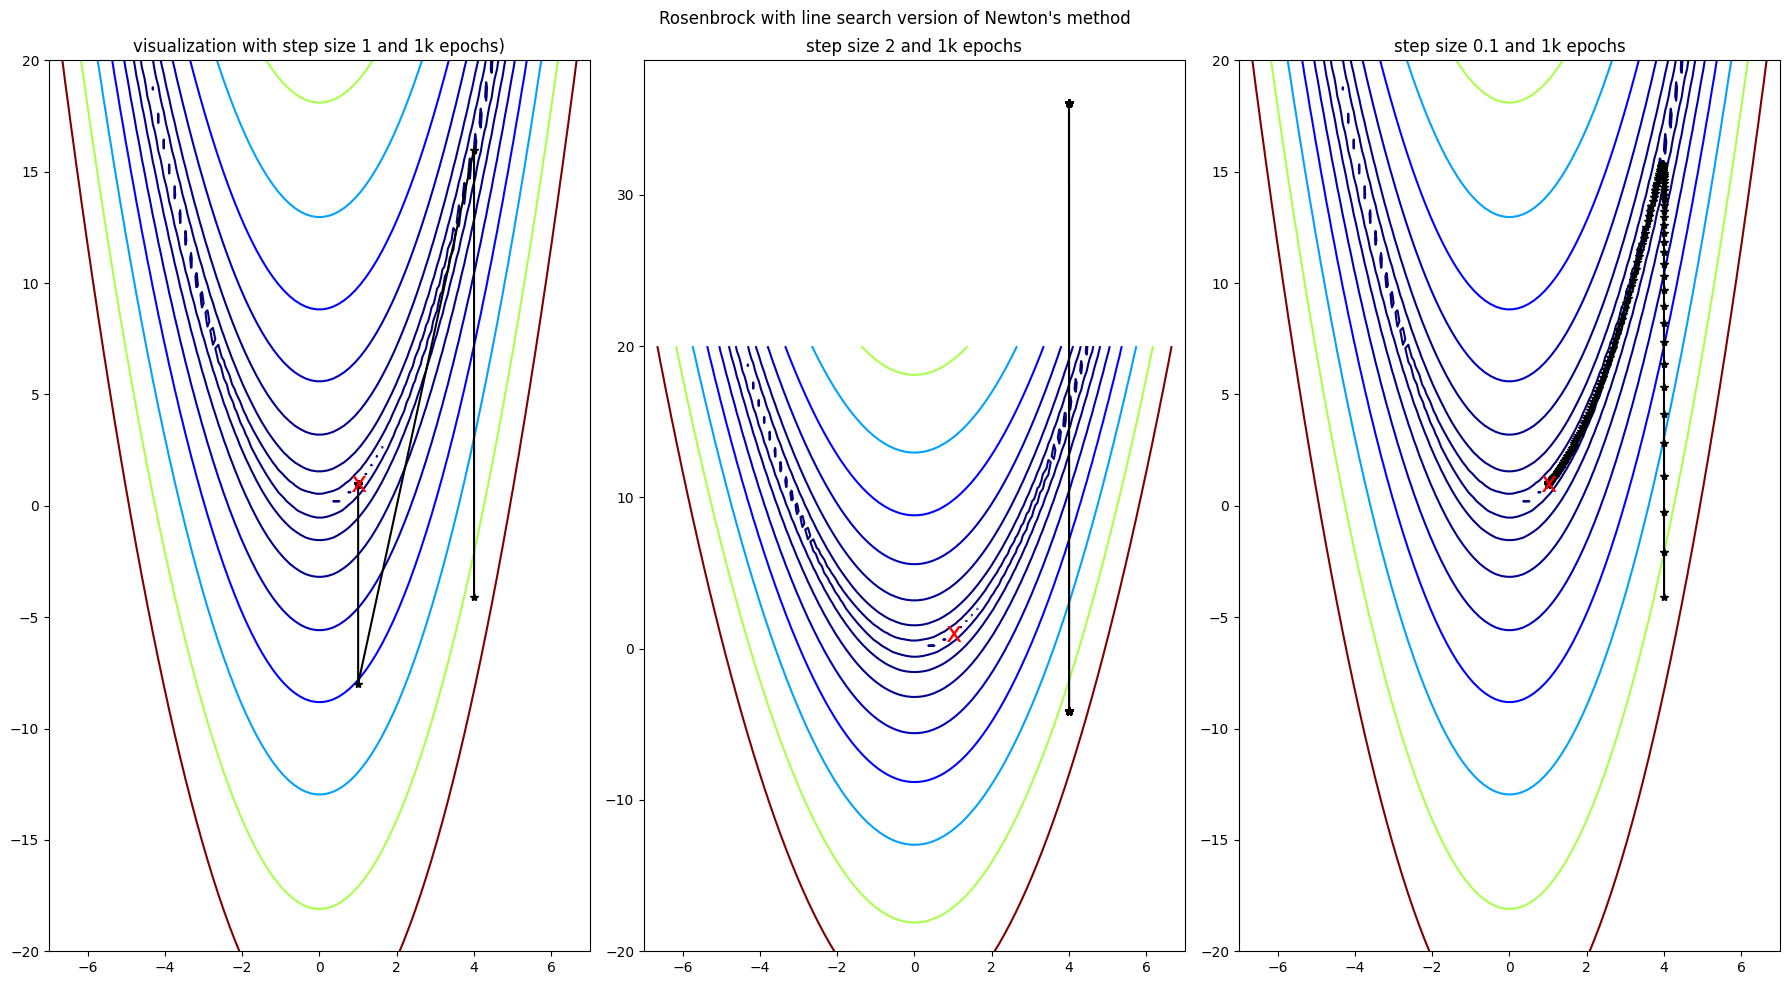

In [6]:
# Ref 1: https://shorturl.at/CrVJu
# Ref 2: https://shorturl.at/W8uNj

def newton_line_rosenbrock(initial_guess=np.array([4, -4.1]),
                           step_size=1,
                           n_iters=1000):
    x = initial_guess
    x_values = [x[0]]
    y_values = [x[1]]

    for _ in range(n_iters):
        gamma = step_size

        # @ is for matrix multiplication
        # Check Ref 1
        x = x - (gamma * (np.linalg.inv(rosen_hess(x)) @ rosen_der(x)))
        x_values.append(x[0])
        y_values.append(x[1])

    return x_values, y_values

x_0, y_0 = newton_line_rosenbrock()

x = np.linspace(-7, 7, 100)
y = np.linspace(-20, 20, 100)
X, Y = np.meshgrid(x, y)
Z = rosen(np.vstack([X.ravel(), Y.ravel()])).reshape((100, 100))

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(18, 10))

# Note: the global minimum is at (1,1) in a tiny contour island
ax[0].contour(X, Y, Z, np.arange(10)**5, cmap='jet')
ax[0].text(1, 1, 'x', va='center', ha='center', color='red', fontsize=20)
ax[0].plot(x_0, y_0, '*-', color="black")
ax[0].set_title("visualization with step size 1 and 1k epochs)")

# Step size of 2 and 1000 epochs
x_1, y_1 = newton_line_rosenbrock(step_size=2)
ax[1].contour(X, Y, Z, np.arange(10)**5, cmap='jet')
ax[1].plot(x_1, y_1, '*-', color='black')
ax[1].text(1, 1, 'x', va='center', ha='center', color='red', fontsize=20)
ax[1].set_title("step size 2 and 1k epochs")

# Step size of 0.1 and 1000 epochs
x_2, y_2 = newton_line_rosenbrock(step_size=0.1)
ax[2].contour(X, Y, Z, np.arange(10)**5, cmap='jet')
ax[2].plot(x_2, y_2, '*-', color='black')
ax[2].text(1, 1, 'x', va='center', ha='center', color='red', fontsize=20)
ax[2].set_title("step size 0.1 and 1k epochs")

plt.suptitle("Rosenbrock with line search version of Newton's method")
plt.tight_layout()
plt.show()

(a) Recall the results in Exercise 1. With the backtracking line search, is the Newton’s method better than the gradient descent method?

Answer: Yes, the result obtained by using the combination of backtracking line search with Newton's method is far superior than that of the gradient descent method. This hybrid algorithm can find the optimal solution with far fewer steps, but at the cost of higher computational resources, as calculating Hessian of Rosenbrock function is computationally expensive.

Newton's method might perform `poorly` with higher step size, as seen in the middle plot.

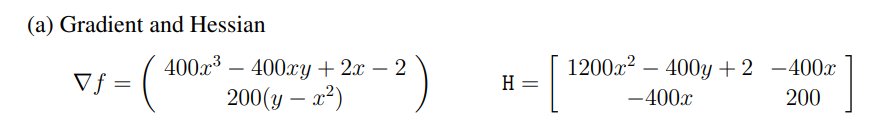

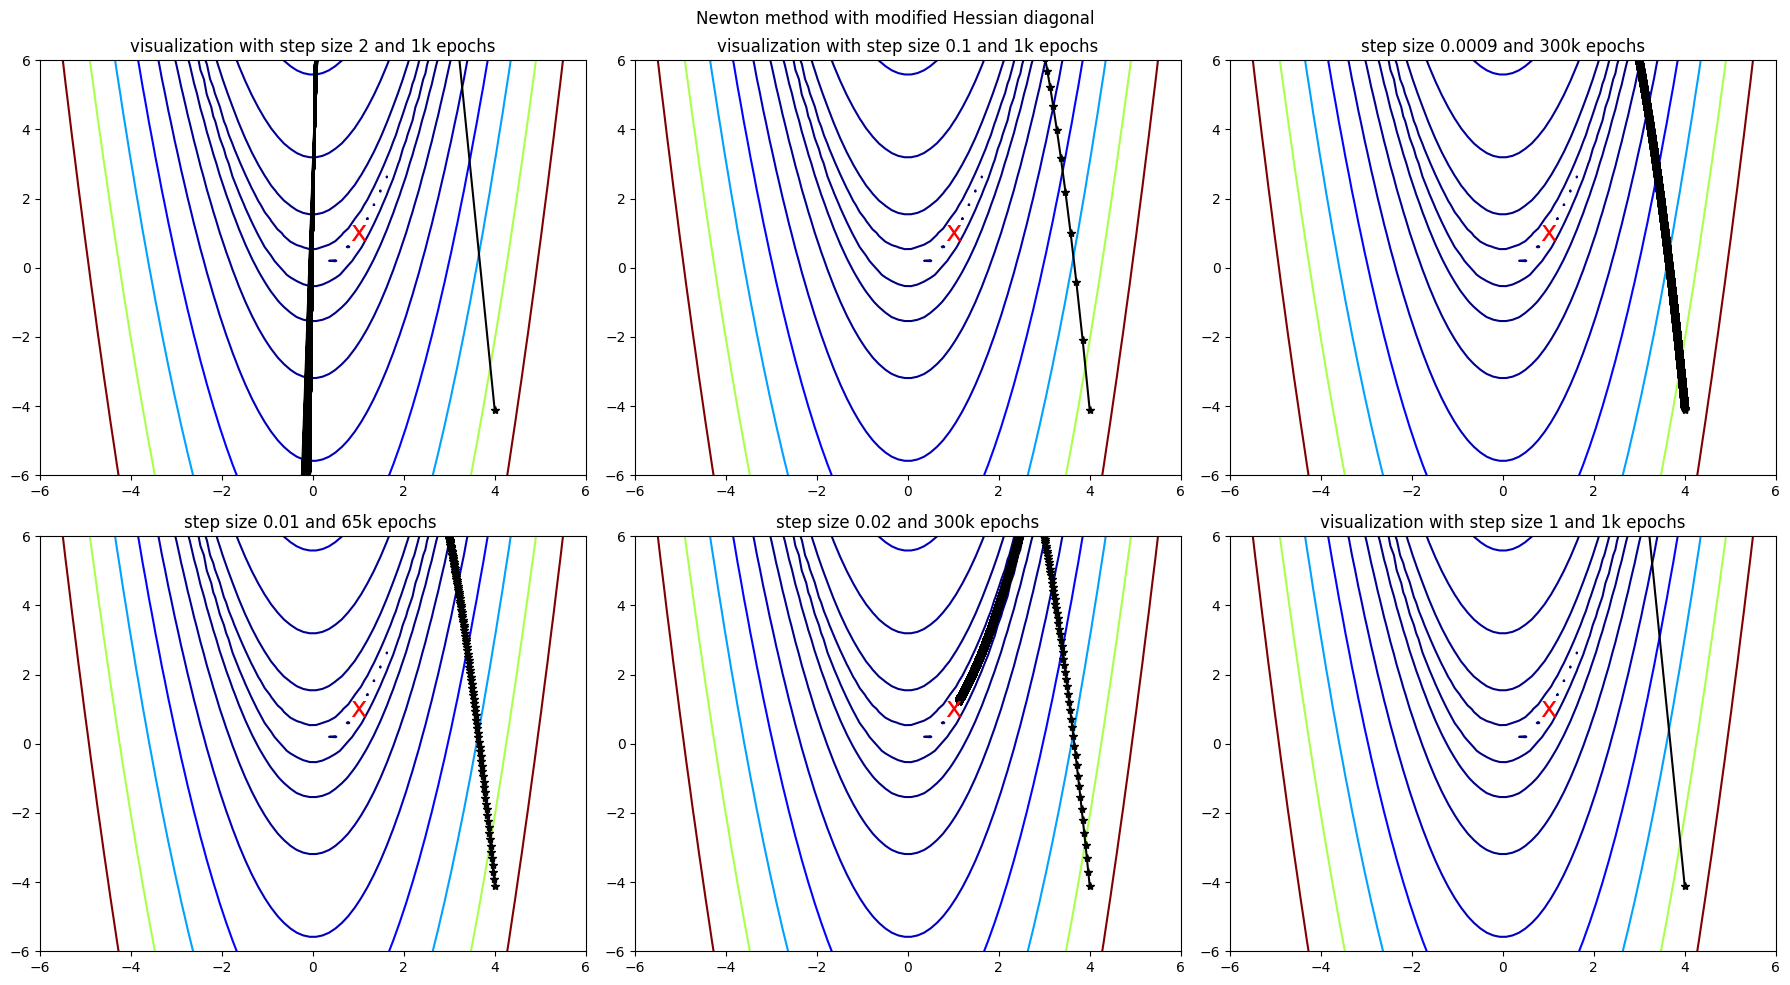

In [7]:
def diagonal_hessian_rosenbrock(initial_guess=np.array([4, -4.1]),
                                step_size=0.0009,
                                n_iters=300000):
    x = initial_guess
    x_values = [x[0]]
    y_values = [x[1]]

    for _ in range(n_iters):
        gamma = step_size

        # Modified hessian matrix
        modified_hessian = np.array([[1200*x[0]**2 - 400*x[1] + 2*x[0] -2, 0],
                                [0, 200]])
        x = x - (gamma * (np.linalg.inv(modified_hessian) @ rosen_der(x)))
        x_values.append(x[0])
        y_values.append(x[1])

    return x_values, y_values

x_0, y_0 = diagonal_hessian_rosenbrock()

x = np.linspace(-7, 7, 100)
y = np.linspace(-20, 20, 100)
X, Y = np.meshgrid(x, y)
Z = rosen(np.vstack([X.ravel(), Y.ravel()])).reshape((100, 100))

fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))

# Step size of 2 and 1000 epochs
ax[0][0].contour(X, Y, Z, np.arange(10)**5, cmap='jet')
ax[0][0].text(1, 1, 'x', va='center', ha='center', color='red', fontsize=20)
x_2, y_2 = diagonal_hessian_rosenbrock(step_size=2, n_iters=1000)
ax[0][0].plot(x_2, y_2, '*-', color="black")
ax[0][0].set_title("visualization with step size 2 and 1k epochs")
ax[0][0].set_xlim(-6, 6)
ax[0][0].set_ylim(-6, 6)

# Step size of 0.1 and 1000 epochs
ax[0][1].contour(X, Y, Z, np.arange(10)**5, cmap='jet')
ax[0][1].text(1, 1, 'x', va='center', ha='center', color='red', fontsize=20)
x_3, y_3 = diagonal_hessian_rosenbrock(step_size=0.1,n_iters=1000)
ax[0][1].plot(x_3, y_3, '*-', color="black")
ax[0][1].set_title("visualization with step size 0.1 and 1k epochs")
ax[0][1].set_xlim(-6, 6)
ax[0][1].set_ylim(-6, 6)

# Default step size of 0.0009 and 300000 epochs
ax[0][2].contour(X, Y, Z, np.arange(10)**5, cmap='jet')
ax[0][2].text(1, 1, 'x', va='center', ha='center', color='red', fontsize=20)
ax[0][2].plot(x_0, y_0, '*-', color="black")
ax[0][2].set_title("step size 0.0009 and 300k epochs")
ax[0][2].set_xlim(-6, 6)
ax[0][2].set_ylim(-6, 6)

# Step size of 0.01 and 65000 epochs
ax[1][0].contour(X, Y, Z, np.arange(10)**5, cmap='jet')
ax[1][0].text(1, 1, 'x', va='center', ha='center', color='red', fontsize=20)
x_4, y_4 = diagonal_hessian_rosenbrock(step_size=0.01, n_iters=65000)
ax[1][0].plot(x_4, y_4, '*-', color='black')
ax[1][0].set_title("step size 0.01 and 65k epochs ")
ax[1][0].set_xlim(-6, 6)
ax[1][0].set_ylim(-6, 6)

# Step size of 0.02 and 300000 epochs
ax[1][1].contour(X, Y, Z, np.arange(10)**5, cmap='jet')
ax[1][1].text(1, 1, 'x', va='center', ha='center', color='red', fontsize=20)
x_5, y_5 = diagonal_hessian_rosenbrock(step_size=0.02)
ax[1][1].plot(x_5, y_5, '*-', color='black')
ax[1][1].set_title("step size 0.02 and 300k epochs")
ax[1][1].set_xlim(-6, 6)
ax[1][1].set_ylim(-6, 6)

# Step size of 1 and 1000 epochs
ax[1][2].contour(X, Y, Z, np.arange(10)**5, cmap='jet')
ax[1][2].text(1, 1, 'x', va='center', ha='center', color='red', fontsize=20)
x_1, y_1 = diagonal_hessian_rosenbrock(step_size=1, n_iters=1000)
ax[1][2].plot(x_1, y_1, '*-', color="black")
ax[1][2].set_title("visualization with step size 1 and 1k epochs")
ax[1][2].set_xlim(-6, 6)
ax[1][2].set_ylim(-6, 6)

plt.suptitle("Newton method with modified Hessian diagonal")
plt.tight_layout()
plt.show()

b. Now, we will approximate the Hessian matrix by its diagonal. How does the Newton's method perform when the Hessian matrix is replaced by Dn?

Answer: When the original Hessian matrix is replaced with a modified Hessian matrix with zeros in the left diagonal, the performance of the Newton's method significantly gets worse.

The modified matrix leads to overshooting with higher step size as seen with step sizes 1 and 2.

As you can see in the 6th plot, the modified Hessian matrix doesn't work with step size of 1 @ 1000 epochs, whereas it worked perfectly with the line search version of Newton's method.

4.5. (Curve fitting; Optional for undergraduates)